# Part 1

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sns
%matplotlib inline

In [2]:
#Loading data and running basic overview of data

df_users = pd.read_csv("csv/Users.csv")
df_users

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,WebsiteUrl,ProfileImageUrl
0,-1,3,2010-11-11T17:29:16.000,Community,2010-11-11T17:29:21.870,on the server farm,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",145,135,11,-1,NaN,NaN
1,2,101,2010-11-11T21:14:59.000,Geoff Dalgas,2015-08-20T17:47:13.240,"Corvallis, OR",<p>Developer on the Stack Overflow team. Find...,6,2,0,2,http://stackoverflow.com,https://i.stack.imgur.com/nDllk.png
2,3,1017,2010-11-11T21:24:20.000,rem,2011-07-12T17:47:27.143,NaN,NaN,2,0,0,68456,NaN,NaN
3,4,727,2010-11-11T21:24:33.000,garik,2011-12-12T08:31:46.870,Russia,<p></p>\n,4,0,0,61635,http://www.igorbaranov.ru,NaN
4,5,720,2010-11-11T21:25:25.000,Magnus,2011-02-12T13:32:13.880,"Glasgow, United Kingdom",<p>I am a undergraduate student studying for a...,3,0,0,209674,http://www.magnusmorton.com,NaN
5,6,101,2010-11-11T21:25:29.000,Emmett,2012-06-12T17:23:55.233,"San Francisco, CA","<p>co-founder of <a href=""https://airtable.com...",1,0,0,1998,http://minesweeperonline.com,https://i.stack.imgur.com/d1oHX.jpg?s=128&g=1
6,7,800,2010-11-11T21:26:08.000,M.S. Dousti,2012-11-23T18:04:58.770,"Tehran, Iran","<p>I got my Ph.D. from <a href=""http://www.sha...",0,0,0,208719,http://ce.sharif.edu/~dousti,NaN
7,8,153,2010-11-11T21:26:30.000,Van Gale,2011-09-22T10:54:48.277,"Denver, CO",<p>I'm a Python developer with over 30 years o...,0,0,0,15955,http://agile.st,NaN
8,9,119,2010-11-11T21:26:56.000,vvucetic,2010-11-11T21:34:17.767,localhost,<p>Developer.</p>\n,2,0,0,433523,NaN,NaN
9,11,534,2010-11-11T21:29:09.000,Eugen Constantin Dinca,2016-07-26T00:12:18.340,"New York, United States",NaN,0,5,0,51486,http://decbis.tumblr.com/,NaN


In [3]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12267 entries, 0 to 12266
Data columns (total 13 columns):
Id                 12267 non-null int64
Reputation         12267 non-null int64
CreationDate       12267 non-null object
DisplayName        12265 non-null object
LastAccessDate     12267 non-null object
Location           6584 non-null object
AboutMe            6245 non-null object
Views              12267 non-null int64
UpVotes            12267 non-null int64
DownVotes          12267 non-null int64
AccountId          12267 non-null int64
WebsiteUrl         4098 non-null object
ProfileImageUrl    7649 non-null object
dtypes: int64(6), object(7)
memory usage: 1.2+ MB


In [4]:
df_users.describe()

,Id,Reputation,Views,UpVotes,DownVotes,AccountId
count,12267.000000,12267.000000,12267.000000,12267.000000,12267.000000,1.226700e+04
mean,67080.328850,448.762371,0.911388,1.271134,0.090405,3.159758e+06
std,51321.324515,3766.191498,12.639061,17.131050,1.871999,3.370762e+06
min,-1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000e+00
25%,20587.500000,101.000000,0.000000,0.000000,0.000000,3.385960e+05
50%,56615.000000,101.000000,0.000000,0.000000,0.000000,1.916595e+06
75%,105896.500000,175.000000,0.000000,0.000000,0.000000,4.964102e+06
max,179377.000000,272521.000000,890.000000,919.000000,107.000000,1.368165e+07


In [5]:
df_users.columns

Index(['Id', 'Reputation', 'CreationDate', 'DisplayName', 'LastAccessDate',
       'Location', 'AboutMe', 'Views', 'UpVotes', 'DownVotes', 'AccountId',
       'WebsiteUrl', 'ProfileImageUrl'],
      dtype='object')

In [6]:
#attempting to format date
creation_date = pd.to_datetime(df_users['CreationDate'])

In [7]:
#new_date =  pd.to_datetime(df_users['CreationDate'].dt.strftime('%Y-%m'))

In [8]:
df_users['CreationDate'].dtypes

dtype('O')

In [9]:
#Creating x and y axis for scatter plot
x_axis = creation_date
y_axis = df_users['Reputation']

/home/iris/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Reputation')

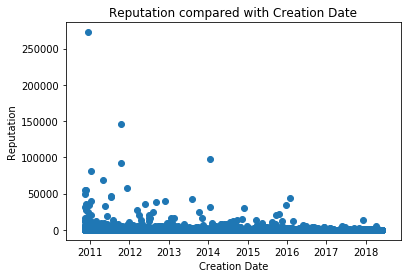

In [10]:
#creating basic visualization and looking to see what distribution looks like for creation date and last accessed date

creation_date = plt.scatter(list(x_axis), list(y_axis), marker="o")
plt.title("Reputation compared with Creation Date")
plt.xlabel("Creation Date")
plt.ylabel("Reputation")

In [11]:
#last_access = df_users['LastAccessDate']

access_date = pd.to_datetime(df_users['LastAccessDate'])

Text(0, 0.5, 'Reputation')

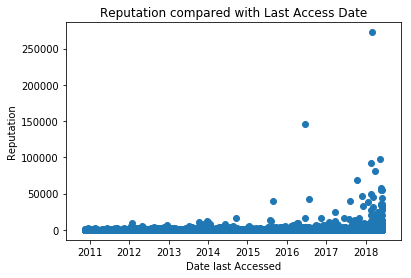

In [12]:
last_access_date = plt.scatter(list(access_date), list(y_axis), marker="o")
plt.title("Reputation compared with Last Access Date")
plt.xlabel("Date last Accessed")
plt.ylabel("Reputation")

A quick obeservation concerning these visulaizations is that I feel strongly that I can assume your reputation will increase with frequency of access to the account/using the platform. Therefore, I would conclude from the comparison of reuptation and last accessed date, that recent usage and more frequent usage can impact reputation positively. 

In [13]:
#checking to see if reputation is dependent upon location. 
#Because of time restrictions I will stick to time as the independent variable.

(df_users['Location']).unique
(df_users['Location']).count

location = (df_users['Location']).dropna(how='any')

location.head(35)

0                  on the server farm
1                       Corvallis, OR
3                              Russia
4             Glasgow, United Kingdom
5                   San Francisco, CA
6                        Tehran, Iran
7                          Denver, CO
8                           localhost
9             New York, United States
10                      Charlotte, NC
13                   Cologne, Germany
14                          Australia
15                           Colorado
16                           Nerdvana
17    Espoo, Southern Finland Finland
18               Texas, United States
20              Florianópolis, Brazil
22                             Israel
24           Scotland, United Kingdom
25                       New York, NY
26                              Italy
27                            Hungary
28                      United States
29                   Montreal, Canada
30                         Denver, CO
31                  Sydney, Australia
32        Ne

# Part 2

In [14]:
#checking the correlation of variables
df_users.corr()

,Id,Reputation,Views,UpVotes,DownVotes,AccountId
Id,1.000000,-0.075651,-0.057647,-0.051649,-0.038795,0.740944
Reputation,-0.075651,1.000000,0.489597,0.358990,0.325091,-0.046248
Views,-0.057647,0.489597,1.000000,0.668030,0.630790,-0.035169
UpVotes,-0.051649,0.358990,0.668030,1.000000,0.892074,-0.029615
DownVotes,-0.038795,0.325091,0.630790,0.892074,1.000000,-0.021651
AccountId,0.740944,-0.046248,-0.035169,-0.029615,-0.021651,1.000000


In [15]:
#Creating a linear regression model

X = df_users[['Views', 'UpVotes', 'DownVotes']]
Y = df_users[['Reputation']]

I chose to use 'Views', 'Upvotes', and 'Downvotes' to train my model because upvotes and downvotes are what determine reputation on StackExchange. I also felt that views could be a benefical feature. If your comment has no visibility it will not be voted on. 

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Reputation')

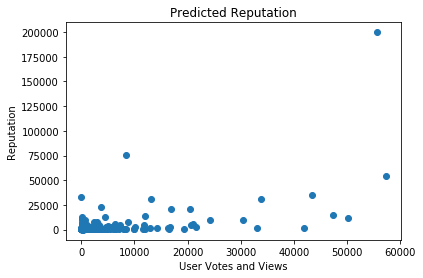

In [19]:
plt.scatter(Y_test,predictions)
plt.title("Predicted Reputation")
plt.xlabel("User Votes and Views")
plt.ylabel("Reputation")

# Part 3

In [20]:
df_comments = pd.read_csv("csv/Comments.csv")

df_comments.head(35)


,Id,PostId,Score,Text,CreationDate,UserId,UserDisplayName
0,1,1,2,"What about ""what web frameworks have security ...",2010-11-11T21:38:11.733,18.0,NaN
1,2,3,0,I just had the same problem...,2010-11-11T23:18:11.167,62.0,NaN
2,3,7,6,"I agree with you, if in a comment you are alre...",2010-11-11T23:29:47.147,26.0,NaN
3,5,5,9,A better way to show appreciation of someone's...,2010-11-12T00:31:15.480,49.0,NaN
4,6,11,0,Sorry I missed that discussion the first time ...,2010-11-12T12:09:10.720,33.0,NaN
5,9,17,0,"Yes, but what happens if a typical programmer,...",2010-11-14T00:44:47.693,33.0,NaN
6,10,11,1,"And @Jeff, **if** we are going the way of merg...",2010-11-14T00:52:53.627,33.0,NaN
7,11,11,0,(there was also one on SIEM/security event mon...,2010-11-14T00:53:42.243,33.0,NaN
8,12,15,6,"I agree, but think we need to define ""educativ...",2010-11-14T00:55:49.603,33.0,NaN
9,13,16,2,This question too - http://security.stackexcha...,2010-11-14T20:55:29.203,33.0,NaN


Categorizing Comments:

Yes, I do believe these comments could be grouped using text analysis. 
I would probably use an unsupervised model for analysis since we do not have defined features but are still tyring to group the comments. 

I might begin analysis by tokenizing common phrases. For this group of comments some categories might be:

Continuous/ongoing issue,
Question Resolved,
Security Specific,
etc.


# Part 4

Some additional questions I would have are the following:
    
1. Which additional features would make a stronger model?
2. Could we predict quality of a user's answer based on the content/quality of the replies to other user's questions?
3. What effect does location have on the quality and reputation of a specific user?
(perhaps stringifying response from location and make replies uniform ie. Europe > specific county or specific city > State > Find correlation coefficient between location and reputation > Ese upvote/down and views as features to train a different model)
